# AdaBoost

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/baoquach/Desktop/Data Science/MindX/Udemy_Data_Course/DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

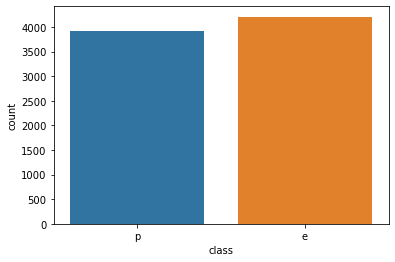

In [4]:
sns.countplot(data=df, x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

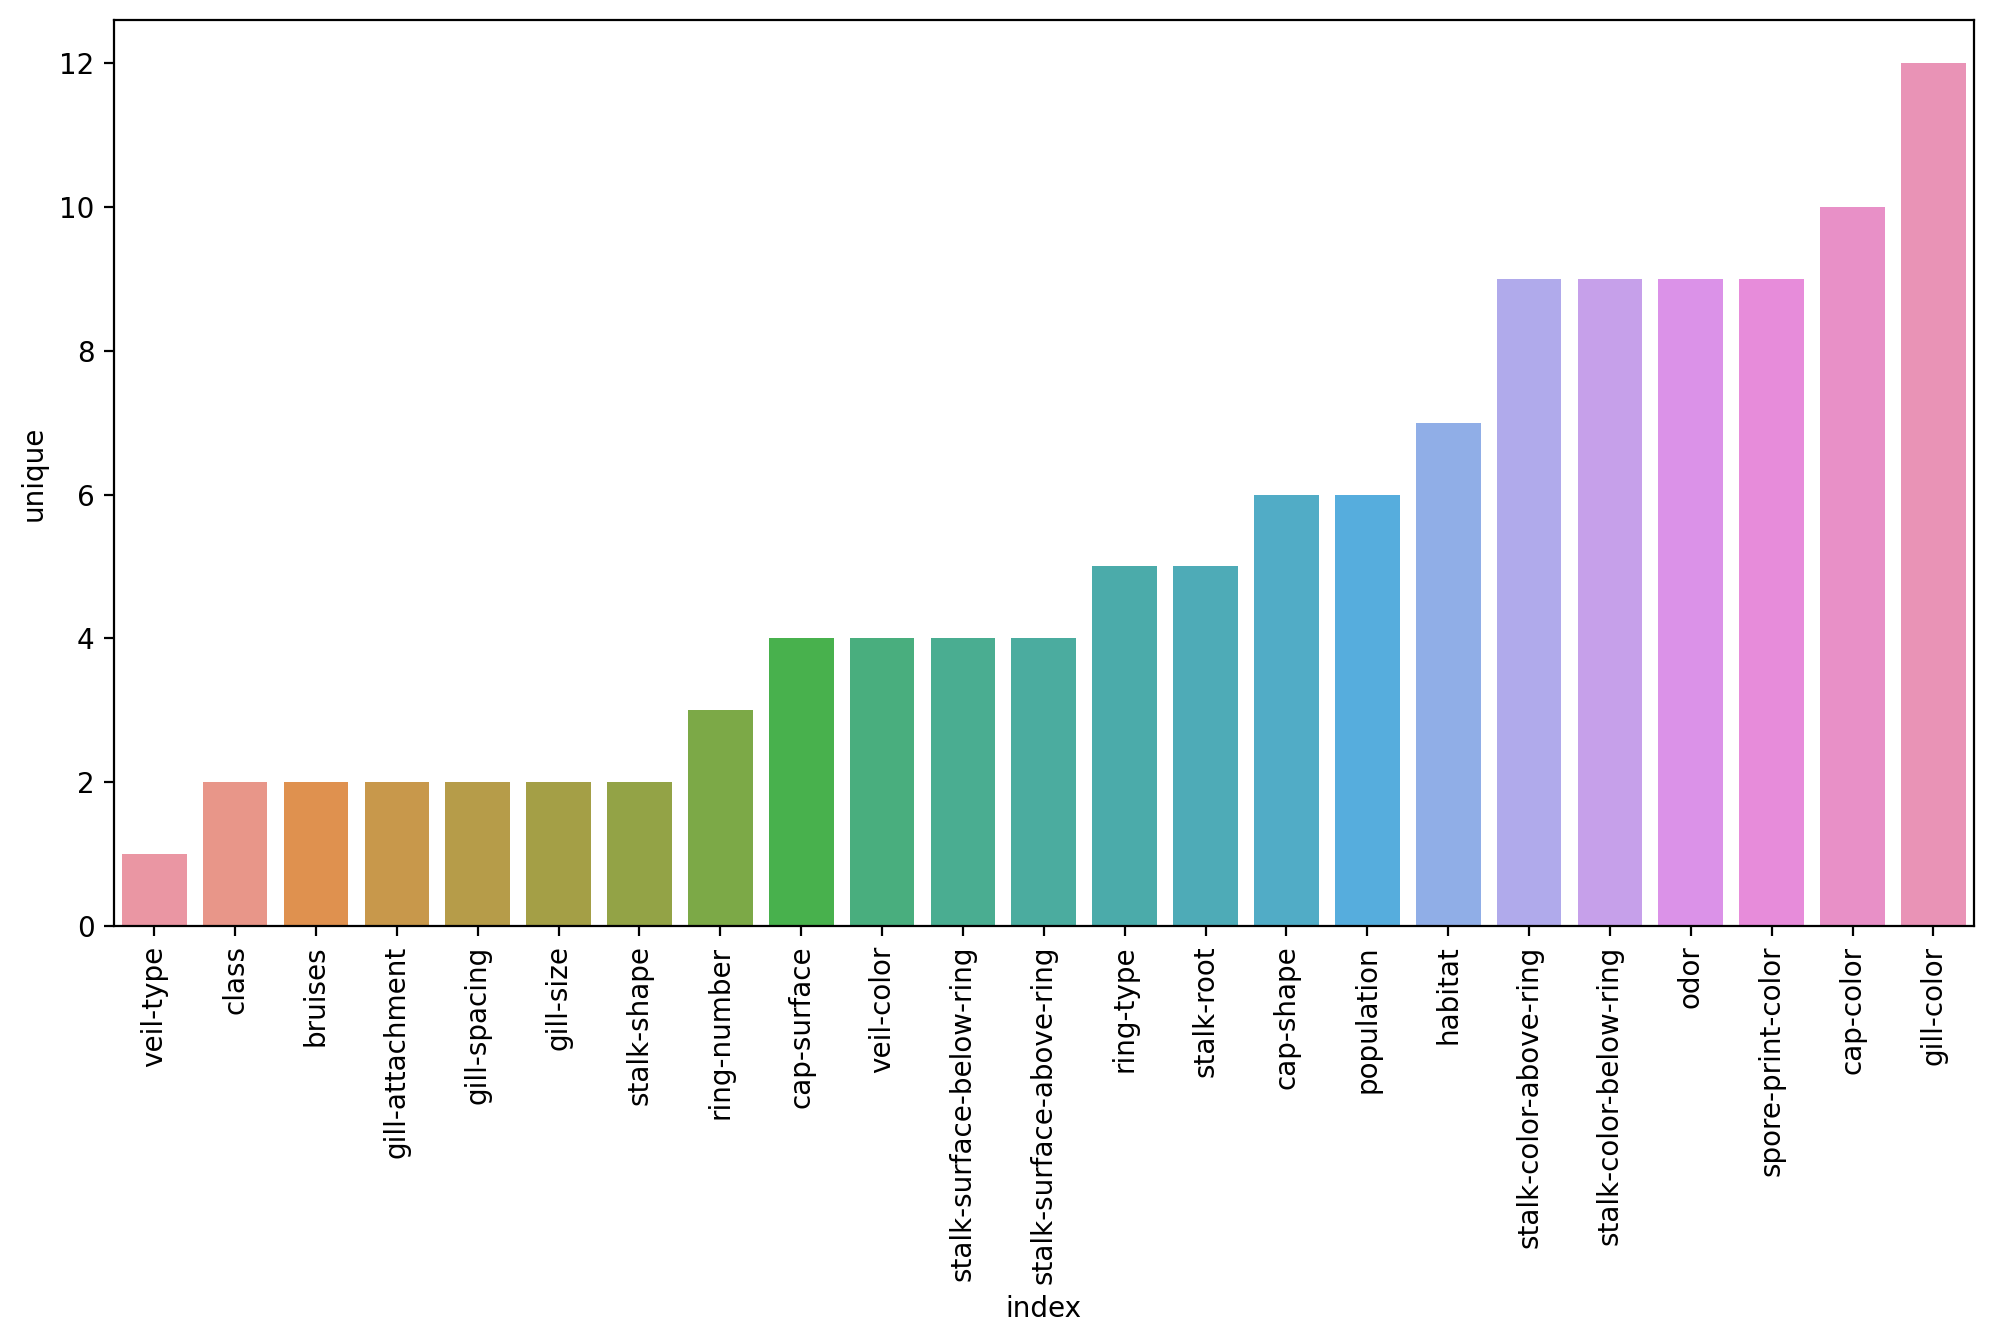

In [7]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(data=feat_uni, x='index', y='unique')
plt.xticks(rotation=90);

In [8]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
# X

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=121)

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
model = AdaBoostClassifier(n_estimators=1)

In [15]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [24]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, accuracy_score

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions

array(['p', 'p', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.97      0.81      0.88       649
           p       0.82      0.97      0.89       570

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



In [20]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
model.feature_importances_.argmax()

22

<AxesSubplot:xlabel='odor', ylabel='count'>

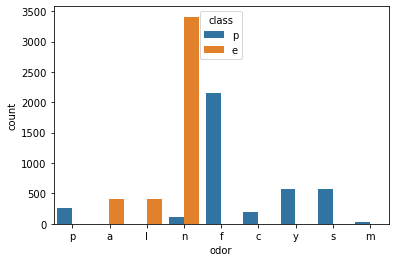

In [22]:
sns.countplot(data=df, x='odor', hue='class')

In [25]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

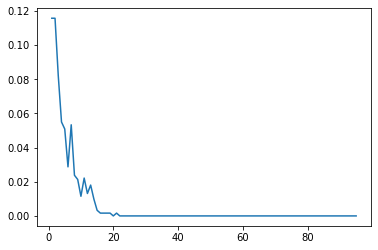

In [26]:
plt.plot(range(1, 96), error_rates)

In [28]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.03157895, 0.03157895, 0.02105263,
       0.        , 0.        , 0.07368421, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.08421053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.        , 0.01052632, 0.01052632,
       0.03157895, 0.        , 0.        , 0.01052632, 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07368421, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04210526, 0.01052632, 0.        , 0.     

In [29]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [31]:
# feats

## Gradient Boosting

In [32]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=121)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
from sklearn.model_selection import GridSearchCV

In [44]:
gb_model = GradientBoostingClassifier()

In [45]:
param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.1,0.05,0.2],
    'max_depth': [3,4,5]
}

In [46]:
grid = GridSearchCV(gb_model, param_grid)

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [48]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix

In [49]:
predictions = grid.predict(X_test)

In [51]:
# predictions

In [52]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=50)

In [53]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       432
           p       1.00      1.00      1.00       381

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [55]:
grid.best_estimator_.feature_importances_

array([ 5.76141278e-04,  2.60284413e-15,  0.00000000e+00,  0.00000000e+00,
        1.66996851e-16,  1.53473613e-03,  8.96728836e-17,  1.92825688e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.91932513e-17,  0.00000000e+00,  0.00000000e+00,  1.72771448e-06,
        0.00000000e+00,  8.07014613e-02,  0.00000000e+00,  1.57423071e-02,
        4.32042992e-03,  9.39988213e-09,  6.17758046e-01,  1.85531547e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.06766170e-03,
        1.31346791e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.60441811e-17,  0.00000000e+00,  1.38379727e-16,
        7.74987650e-16,  5.44585256e-18,  8.26087515e-18,  0.00000000e+00,
        0.00000000e+00,  6.59075297e-04,  9.96504341e-02,  2.45116456e-02,
        2.06723113e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.04985672e-16,  3.95811910e-02,  1.92056737e-08,
        0.00000000e+00,  

In [56]:
feat_import = grid.best_estimator_.feature_importances_

In [57]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [58]:
imp_feat

,Importance
cap-shape_c,5.761413e-04
cap-shape_f,2.602844e-15
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.669969e-16
...,...
habitat_l,5.531165e-06
habitat_m,1.664935e-16
habitat_p,0.000000e+00
habitat_u,1.639872e-17
